In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras_facenet import FaceNet
from tqdm import tqdm
import umap.umap_ as umap

C:\Users\leo28\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('fairface_label_val.csv')
df

file    age  gender             race  service_test
0          val/1.jpg    3-9    Male       East Asian         False
1          val/2.jpg  50-59  Female       East Asian          True
2          val/3.jpg  30-39    Male            White          True
3          val/4.jpg  20-29  Female  Latino_Hispanic          True
4          val/5.jpg  20-29    Male  Southeast Asian         False
...              ...    ...     ...              ...           ...
10949  val/10950.jpg  30-39    Male            White          True
10950  val/10951.jpg  50-59    Male            White         False
10951  val/10952.jpg  60-69    Male  Latino_Hispanic         False
10952  val/10953.jpg  20-29  Female       East Asian         False
10953  val/10954.jpg  40-49    Male  Latino_Hispanic          True

[10954 rows x 5 columns]

In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
embedder = FaceNet()

In [5]:
def load_image(img_path):
    img = plt.imread(img_path)
    if img.shape[-1] == 4:
        img = img[..., :3]  # Discard the alpha channel if present
    return img

In [6]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['green', 'yellow', 'red', 'blue', 'cyan', 'purple', 'orange'])

In [7]:
path = 'val'

In [8]:
embeddings = []
labels = []
y_label = []
for filename in os.listdir(path):
    if filename.endswith('.jpg'):
        img_path = os.path.join(path, filename)
        img = load_image(img_path)
        img = np.expand_dims(img, axis=0)  # Expand dimensions to add batch size of 1
        embedding = embedder.embeddings(img)
        embeddings.append(embedding[0])

        # Retrieve the race label from the DataFrame using the filename
        race_label = df.loc[df['file'] == 'val/'+filename, 'race'].values[0]
        labels.append(race_label)
        y_label.append(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━

In [9]:
label_counts = Counter(labels)
print("Label counts:", label_counts)

Label counts: Counter({'White': 2085, 'Latino_Hispanic': 1623, 'Black': 1556, 'East Asian': 1550, 'Indian': 1516, 'Southeast Asian': 1415, 'Middle Eastern': 1209})


In [10]:
embeddings = np.array(embeddings)
embeddings.shape

(10954, 512)

C:\Users\leo28\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


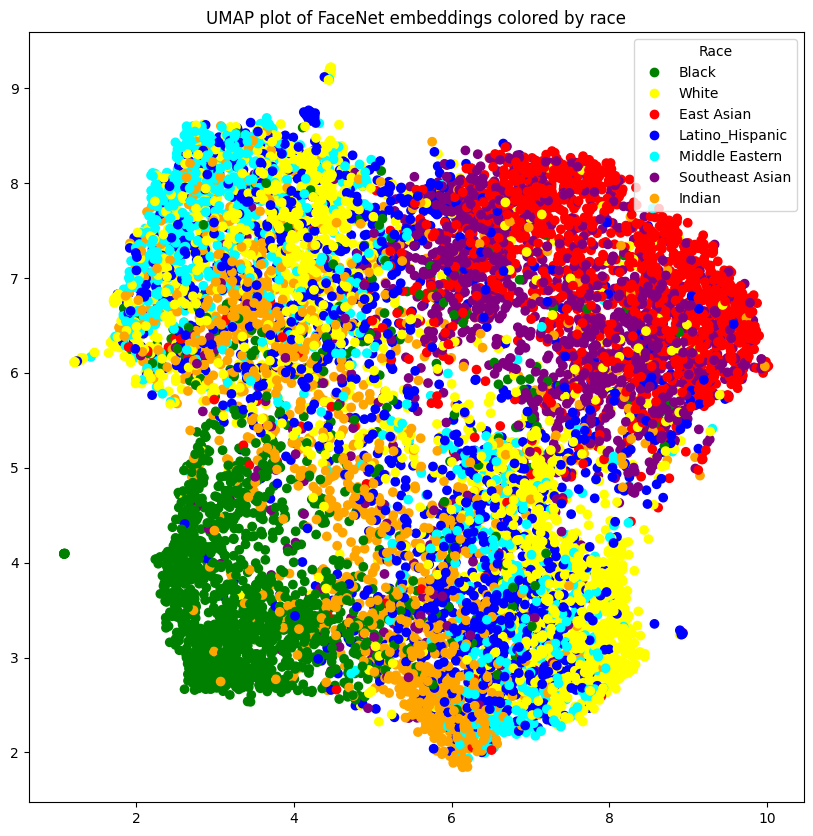

In [11]:
# Perform UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = umap_reducer.fit_transform(embeddings)

# Convert race labels to numerical values
unique_labels = list(set(labels))
label_to_num = {label: num for num, label in enumerate(unique_labels)}
num_labels = [label_to_num[label] for label in labels]

# Plotting
plt.figure(figsize=(10, 10))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=num_labels, cmap=custom_cmap, alpha=1)
plt.legend(handles=scatter.legend_elements()[0], labels=unique_labels, title="Race")
plt.title('UMAP plot of FaceNet embeddings colored by race')
plt.show()

In [12]:
import cv2

# Função de carregamento de imagem fornecida
def load_image_cifar(img_array):
    img = img_array
    if img.shape[-1] == 4:
        img = img[..., :3]  # Descartar o canal alpha, se presente
    img = cv2.resize(img, (160, 160))  # Redimensionar para 160x160
    img = img.astype(np.float32)
    img = (img - 127.5) / 127.5  # Normalizar a imagem
    return img

In [13]:
# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Combinar conjuntos de treino e teste
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

embeddings_cifar = []
labels_cifar = []
y_teste = []
counter = 0
for i in range(len(x_data)):
    img = load_image_cifar(x_data[i])
    img = np.expand_dims(img, axis=0)  # Expandir dimensões para adicionar batch size de 1
    embedding = embedder.embeddings(img)
    embeddings_cifar.append(embedding[0])
    labels_cifar.append('Not Face')
    y_teste.append(0)
    counter += 1
    if counter == 10954:
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [14]:
# Convertendo para arrays numpy
embeddings_cifar = np.array(embeddings_cifar)
labels_cifar = np.array(labels_cifar)
y_teste = np.array(y_teste)

In [15]:
print(embeddings_cifar.shape)
print(y_teste.shape)
labels_cifar.shape

(10954, 512)
(10954,)


(10954,)

Acurácia: 100.00%
F1 Score: 1.00


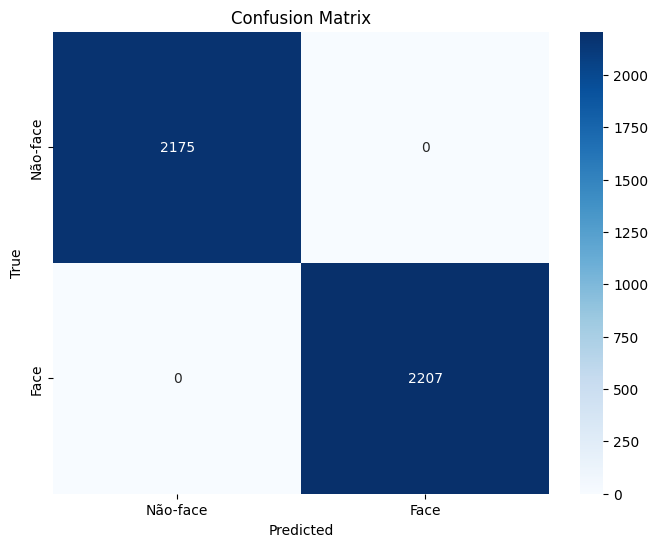

In [16]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha os seguintes arrays
# embeddings: embeddings de faces
# embeddings_cifar: embeddings de imagens CIFAR-10
# y_label: rótulos para faces (1 para face)
# y_teste: rótulos para CIFAR-10 (0 para não-face)
# labels: rótulos das raças para cada face embedding

# Criar arrays numpy se não estiverem já nesse formato
embeddings = np.array(embeddings)
embeddings_cifar = np.array(embeddings_cifar)
y_label = np.array(y_label)
y_teste = np.array(y_teste)
labels = np.array(labels)

# Combinar embeddings e rótulos
X = np.concatenate((embeddings, embeddings_cifar), axis=0)
y = np.concatenate((y_label, y_teste), axis=0)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Calcular a pontuação F1
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Calcular e plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-face', 'Face'], yticklabels=['Não-face', 'Face'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
genders = []
for filename in os.listdir(path):
    if filename.endswith('.jpg'):
        # Recuperar o gênero a partir do DataFrame usando o nome do arquivo
        gender_label = df.loc[df['file'] == 'val/' + filename, 'gender'].values[0]
        genders.append(gender_label)
genders = np.array(genders)
genders

array(['Male', 'Male', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype='<U6')

Acurácia: 90.10%
F1 Score: 0.90


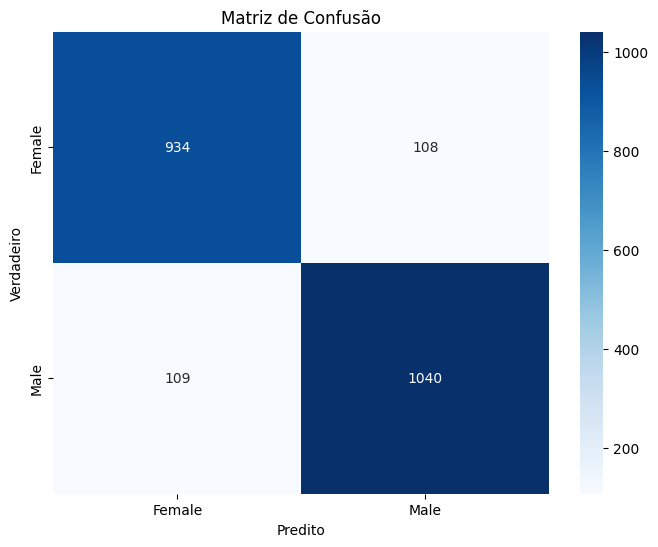

In [12]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você já tenha os seguintes arrays
# embeddings: embeddings de faces
# genders: rótulos de gênero para as faces
# label: rótulos de raça para as faces

# Convertendo para arrays numpy se não estiverem já nesse formato
embeddings = np.array(embeddings)
genders = np.array(genders)
races = np.array(labels)

# Mapear rótulos de gênero para valores numéricos
gender_map = {'Female': 0, 'Male': 1}
genders_numeric = np.array([gender_map[gender] for gender in genders])

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test, labels_train, labels_test = train_test_split(embeddings, genders_numeric, races, test_size=0.2, random_state=42)

# Treinar o modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')
# Calcular a pontuação F1
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Calcular e plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

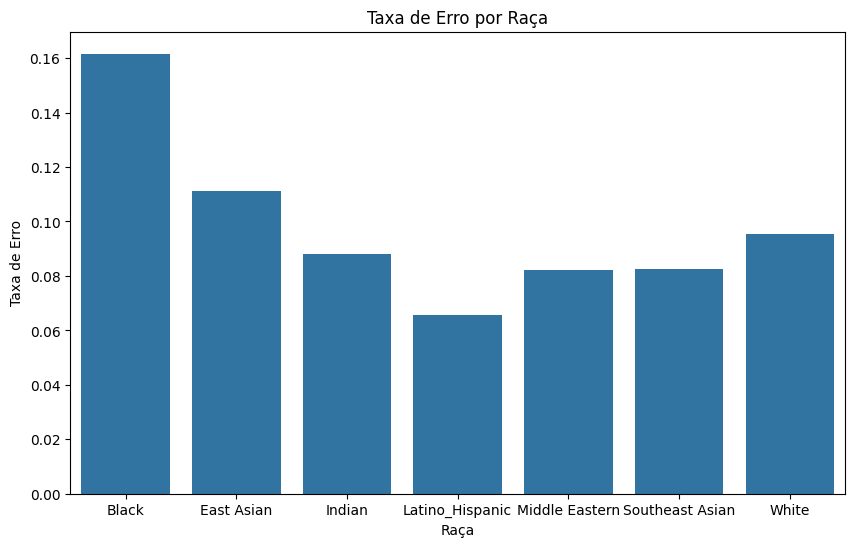

In [13]:

# Calcular erros de predição
errors = y_pred != y_test

# Calcular a taxa de erro por raça
unique_labels = np.unique(labels_test)
error_rates = {label: np.mean(errors[labels_test == label]) for label in unique_labels}

# Plotar a taxa de erro por raça
plt.figure(figsize=(10, 6))
sns.barplot(x=list(error_rates.keys()), y=list(error_rates.values()))
plt.xlabel('Raça')
plt.ylabel('Taxa de Erro')
plt.title('Taxa de Erro por Raça')
plt.show()


In [36]:
len(y_test)

2191

In [38]:
np.unique(races)

array(['Black', 'East Asian', 'Indian', 'Latino_Hispanic',
       'Middle Eastern', 'Southeast Asian', 'White'], dtype='<U15')


Taxas de Erro por Raça e Gênero:
True Race-Gender
Black-Female              0.210526
Black-Male                0.110429
East Asian-Female         0.082192
East Asian-Male           0.137500
Indian-Female             0.078431
Indian-Male               0.097403
Latino_Hispanic-Female    0.074534
Latino_Hispanic-Male      0.057143
Middle Eastern-Female     0.100000
Middle Eastern-Male       0.073826
Southeast Asian-Female    0.084615
Southeast Asian-Male      0.080745
White-Female              0.085308
White-Male                0.106952
Name: Error, dtype: float64


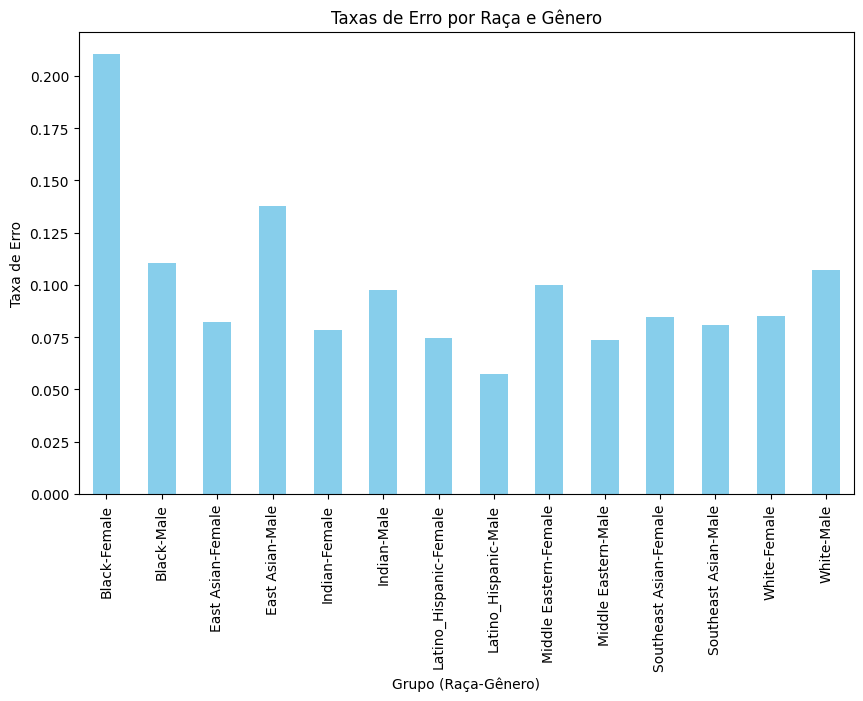

In [14]:
# Analisar a distribuição de erros por raça e gênero
results_df = pd.DataFrame({'True Gender': y_test, 'Pred Gender': y_pred, 'Race Name': labels_test})
results_df['Error'] = results_df['True Gender'] != results_df['Pred Gender']

# Criar colunas combinadas para raça e gênero
results_df['True Race-Gender'] = results_df['Race Name'] + '-' + results_df['True Gender'].map({0: 'Female', 1: 'Male'})
results_df['Pred Race-Gender'] = results_df['Race Name'] + '-' + results_df['Pred Gender'].map({0: 'Female', 1: 'Male'})

# Calcular as taxas de erro por grupo
group_error_rates = results_df.groupby('True Race-Gender')['Error'].mean()

# Exibir taxas de erro por grupo
print("\nTaxas de Erro por Raça e Gênero:")
print(group_error_rates)

# Plotar taxas de erro por grupo
plt.figure(figsize=(10, 6))
group_error_rates.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo (Raça-Gênero)')
plt.ylabel('Taxa de Erro')
plt.title('Taxas de Erro por Raça e Gênero')
plt.show()

In [28]:
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, selection_rate,false_negative_rate,true_negative_rate

# Criar um DataFrame com os resultados
results_df = pd.DataFrame({
    'True Gender': y_test,
    'Pred Gender': y_pred,
    'Race': labels_test
})

# Calcular métricas usando Fairlearn
metrics = {
    'true_positive_rate': true_positive_rate,
    'false_positive_rate': false_positive_rate,
    'true_negative_rate': true_negative_rate,
    'false_negative_rate': false_negative_rate,
    'selection_rate': selection_rate
}

metric_frame = MetricFrame(metrics=metrics, y_true=results_df['True Gender'], y_pred=results_df['Pred Gender'], sensitive_features=results_df['Race'])

# Paridade Demográfica: selection_rate
demographic_parity = metric_frame.by_group['selection_rate']
print("\nParidade Demográfica (Taxa de Seleção por Raça):")
print(demographic_parity)

# Igualdade de Oportunidade: true_positive_rate
equalized_opportunity = metric_frame.by_group['true_positive_rate']
print("\nIgualdade de Oportunidade (Taxa de Verdadeiros Positivos por Raça):")
print(equalized_opportunity)

# Igualdade de Chance: true_positive_rate e false_negative_rate
equalized_chance = metric_frame.by_group[['true_positive_rate', 'false_positive_rate']]
print("\nIgualdade de Chance (Taxas de Verdadeiros Positivos e Falsos Negativos por Raça):")
print(equalized_chance)

# Compute true positive rate and false positive rate by group
true_positive_rates = metric_frame.by_group['true_positive_rate']
false_positive_rates = metric_frame.by_group['false_positive_rate']

# Compare true positive rate and false positive rate for each group
predictive_parity = (true_positive_rates - false_positive_rates).abs()

print("Predictive Parity (Absolute Difference between True Positive Rate and False Positive Rate by Race):")
print(predictive_parity)

# Compute false positive rate and false negative rate by group
false_positive_rates = metric_frame.by_group['false_positive_rate']
false_negative_rates = metric_frame.by_group['false_negative_rate']

# Compare false positive rate and false negative rate for each group
treatment_equality = (false_positive_rates - false_negative_rates).abs()

print("Equality of Treatment (Absolute Difference between False Positive Rate and False Negative Rate by Race):")
print(treatment_equality)


Paridade Demográfica (Taxa de Seleção por Raça):
Race
Black              0.541916
East Asian         0.490196
Indian             0.491857
Latino_Hispanic    0.526786
Middle Eastern     0.662100
Southeast Asian    0.546392
White              0.464824
Name: selection_rate, dtype: float64

Igualdade de Oportunidade (Taxa de Verdadeiros Positivos por Raça):
Race
Black              0.889571
East Asian         0.862500
Indian             0.902597
Latino_Hispanic    0.942857
Middle Eastern     0.926174
Southeast Asian    0.919255
White              0.893048
Name: true_positive_rate, dtype: float64

Igualdade de Chance (Taxas de Verdadeiros Positivos e Falsos Negativos por Raça):
                 true_positive_rate  false_positive_rate
Race                                                    
Black                      0.889571             0.210526
East Asian                 0.862500             0.082192
Indian                     0.902597             0.078431
Latino_Hispanic            0.9428

In [17]:
equalized_chance

true_positive_rate  false_negative_rate
Race                                                    
Black                      0.889571             0.110429
East Asian                 0.862500             0.137500
Indian                     0.902597             0.097403
Latino_Hispanic            0.942857             0.057143
Middle Eastern             0.926174             0.073826
Southeast Asian            0.919255             0.080745
White                      0.893048             0.106952

In [45]:
# Calculate Demographic Parity
demographic_parity = results_df.groupby('Race Name')['Pred Gender'].mean()
print("\nDemographic Parity (Positive Prediction Rates by Race):")
print(demographic_parity)

# Calculate Equalized Odds
equalized_odds = results_df.groupby('Race Name').apply(
    lambda df: pd.Series({
        'TPR': (df['True Gender'] == df['Pred Gender']).mean(), 
        'FPR': (df['True Gender'] != df['Pred Gender']).mean()
    })
)
print("\nEqualized Odds (True Positive and False Positive Rates by Race):")
print(equalized_odds)


Demographic Parity (Positive Prediction Rates by Race):
Race Name
Black              0.541916
East Asian         0.490196
Indian             0.491857
Latino_Hispanic    0.526786
Middle Eastern     0.662100
Southeast Asian    0.546392
White              0.464824
Name: Pred Gender, dtype: float64

Equalized Odds (True Positive and False Positive Rates by Race):
                      TPR       FPR
Race Name                          
Black            0.838323  0.161677
East Asian       0.888889  0.111111
Indian           0.912052  0.087948
Latino_Hispanic  0.934524  0.065476
Middle Eastern   0.917808  0.082192
Southeast Asian  0.917526  0.082474
White            0.904523  0.095477


C:\Users\leo28\AppData\Local\Temp\ipykernel_5292\3601114874.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  equalized_odds = results_df.groupby('Race Name').apply(


Acurácia: 100.00%
F1 Score: 1.00


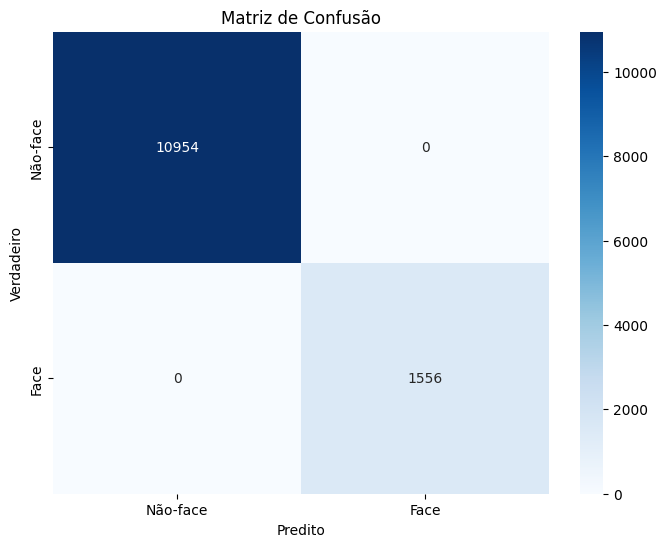

In [20]:
# Convertendo para arrays numpy se não estiverem já nesse formato
embeddings = np.array(embeddings)
embeddings_cifar = np.array(embeddings_cifar)
y_label = np.array(y_label)
y_teste = np.array(y_teste)
labels = np.array(labels)

# Filtrar dados para rostos brancos e latinos (treinamento) e negros (teste)
train_mask = np.isin(labels, ['White', 'Latino_Hispanic'])
test_mask = labels == 'Black'

# Dados de treino: apenas rostos brancos e latinos combinados com CIFAR-10
X_train_faces = embeddings[train_mask]
y_train_faces = y_label[train_mask]

X_train = np.concatenate((X_train_faces, embeddings_cifar), axis=0)
y_train = np.concatenate((y_train_faces, y_teste), axis=0)

# Dados de teste: apenas rostos negros combinados com CIFAR-10
X_test_faces = embeddings[test_mask]
y_test_faces = y_label[test_mask]

X_test = np.concatenate((X_test_faces, embeddings_cifar), axis=0)
y_test = np.concatenate((y_test_faces, y_teste), axis=0)

# Treinar o modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Calcular a pontuação F1
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Calcular e plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-face', 'Face'], yticklabels=['Não-face', 'Face'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [21]:
# Convertendo para arrays numpy se não estiverem já nesse formato
embeddings = np.array(embeddings)
genders = np.array(genders)
labels = np.array(label)

# Mapear rótulos de gênero para valores numéricos
gender_map = {'Female': 0, 'Male': 1}
genders_numeric = np.array([gender_map[gender] for gender in genders])

# Filtrar dados para rostos brancos (treinamento) e negros (teste)
white_mask = labels == 'White'
black_mask = labels == 'Black'

# Dados de treino: apenas rostos brancos
X_train = embeddings[white_mask]
y_train = genders_numeric[white_mask]

# Dados de teste: apenas rostos negros
X_test = embeddings[black_mask]
y_test = genders_numeric[black_mask]

# Treinar o modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Calcular a pontuação F1
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Calcular e plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

NameError: name 'label' is not defined

In [ ]:
# Calcular erros de predição
errors = y_pred != y_test

# Calcular a taxa de erro por raça (neste caso, só temos raça negra no teste)
unique_labels = np.unique(labels[black_mask])
error_rates = {label: np.mean(errors[labels[black_mask] == label]) for label in unique_labels}

# Plotar a taxa de erro por raça
plt.figure(figsize=(10, 6))
sns.barplot(x=list(error_rates.keys()), y=list(error_rates.values()))
plt.xlabel('Raça')
plt.ylabel('Taxa de Erro')
plt.title('Taxa de Erro para Rostos Negros')
plt.show()